In [49]:
# Dataset comes from Kaggle 
# https://www.kaggle.com/mirichoi0218/insurance

Columns

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

In [89]:
#Import packages
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [32]:
folder = 'C:/Users/caitlin.lorcher/OneDrive - Slalom/Documents/Python Lunch and Learn/'
filename = 'insurance.csv'
filepath = folder + filename

In [33]:
#load data from file into a pandas data frame
df = pd.read_csv(filepath)

In [37]:
#view top 5 records
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [38]:
#view last 5 records
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [39]:
#display number of columns and rows of the dataset
df.shape

(1338, 7)

In [40]:
#Display column info - datatypes, counts, non-null columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [41]:
#Display column summary statistics
#Describe only summarizes the columns with a numeric datatype
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [47]:
#Display unique values for specified column - in this case we are looking at the region column
df['region'].unique() 

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [42]:
#Display % breakdown for number of children
df['children'].value_counts(normalize=True)

0    0.428999
1    0.242152
2    0.179372
3    0.117339
4    0.018685
5    0.013453
Name: children, dtype: float64

In [44]:
#Sort the values in descending order by the "charges" column 
#Display the top 5 rows
df.sort_values(by="charges", ascending=False).head()

,age,sex,bmi,children,smoker,region,charges
543,54,female,47.410,0,yes,southeast,63770.42801
1300,45,male,30.360,0,yes,southeast,62592.87309
1230,52,male,34.485,3,yes,northwest,60021.39897
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209


In [48]:
#Sort the values in ascending order by the "charges" column 
#Display the top 5 rows - i.e. the lowest charges
df.sort_values(by="charges", ascending=True).head()

,age,sex,bmi,children,smoker,region,charges
940,18,male,23.21,0,no,southeast,1121.8739
808,18,male,30.14,0,no,southeast,1131.5066
1244,18,male,33.33,0,no,southeast,1135.9407
663,18,male,33.66,0,no,southeast,1136.3994
22,18,male,34.10,0,no,southeast,1137.0110


In [54]:
columns_to_show = ["charges"]

df.groupby(["sex","region"])[columns_to_show].describe(percentiles=[])

charges                                                       \
                   count          mean           std         min          50%   
sex    region                                                                   
female northeast   161.0  12953.203151  10591.929980  2196.47320  10197.77220   
       northwest   164.0  12479.870397  10596.572843  2117.33885   9614.07290   
       southeast   175.0  13499.669243  12587.261506  1607.51010   8582.30230   
       southwest   162.0  11274.411264  10453.660658  1727.78500   8530.83700   
male   northeast   163.0  13854.005374  11890.942381  1694.79640   9957.72160   
       northwest   161.0  12354.119575  11569.561020  1621.34020   8413.46305   
       southeast   189.0  15879.617173  15083.360816  1121.87390   9504.31030   
       southwest   163.0  13412.883576  12499.550025  1241.56500   9391.34600   

                               
                          max  
sex    region                  
female northeast  58571.07448  
       northwest  55135.40209  
       southeast  63770.42801  
       southwest  48824.45000  
male   northeast  48549.17835  
       northwest  60021.39897  
       southeast  62592.87309  
       southwest  52590.82939

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'charges'}>]], dtype=object)

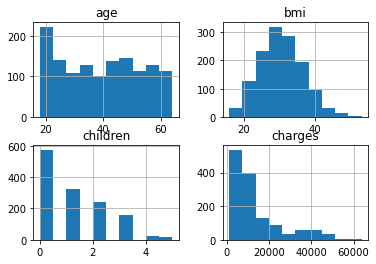

In [58]:
#display simple histogram for each numeric column
df.hist()

<AxesSubplot:>

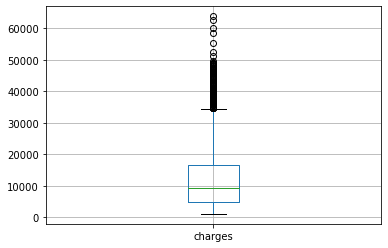

In [59]:
#Look for outliers in the charges column 
df.boxplot(column = 'charges')

female         AxesSubplot(0.1,0.15;0.363636x0.75)
male      AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

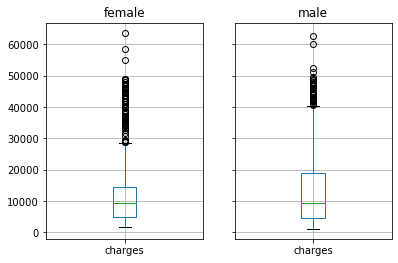

In [68]:
#display boxplot by gender
df.groupby('sex').boxplot(column = 'charges')

In [70]:
#Display correlation table
#Age and BMI are correlated with higher the charges 
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [72]:
#Group individuals by gender and smoking status to identify more information about the correlation with charges
df.groupby(['sex','smoker']).corr()

age       bmi  children   charges
sex    smoker                                                 
female no     age       1.000000  0.089160  0.079141  0.621786
              bmi       0.089160  1.000000  0.051120  0.075093
              children  0.079141  0.051120  1.000000  0.176355
              charges   0.621786  0.075093  0.176355  1.000000
       yes    age       1.000000  0.123585  0.071392  0.360157
              bmi       0.123585  1.000000 -0.115732  0.845910
              children  0.071392 -0.115732  1.000000 -0.016352
              charges   0.360157  0.845910 -0.016352  1.000000
male   no     age       1.000000  0.157108 -0.013316  0.634549
              bmi       0.157108  1.000000 -0.012269  0.095904
              children -0.013316 -0.012269  1.000000  0.100066
              charges   0.634549  0.095904  0.100066  1.000000
       yes    age       1.000000  0.009196  0.089524  0.379154
              bmi       0.009196  1.000000  0.047140  0.769355
              children  0.089524  0.047140  1.000000  0.061737
              charges   0.379154  0.769355  0.061737  1.000000

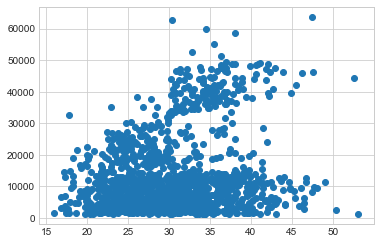

In [94]:
#Scatter plot of charges and BMI
#There is clearly another factor that affects the charges in conjunction with the BMI
plt.scatter(df.bmi, df.charges)